# Traffic Sign Recogniser - 99% accuracy

### Import libraries

In [2]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Set Constrains

In [3]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

### Define 'load_data' function

In [4]:
def load_data(data_dir):
    images = []
    labels = []
    for i in range(NUM_CATEGORIES):
        path = os.path.join(data_dir, str(i))
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(data_dir, str(i), image))
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(i)
    return images, labels


### Define 'get_model' Function

In [5]:
def get_model():
    model = tf.keras.models.Sequential([    
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
model = get_model()

### Load Data and Train/Test Split

In [7]:
# Replace 'data_directory_path' with the path to your data directory
data_directory_path = 'gtsrb/'
images, labels = load_data(data_directory_path)
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE)


### Create and Train the Model

In [8]:
model = get_model()
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/10


500/500 [==============================] - 5s 8ms/step - loss: 0.6851 - accuracy: 0.8219 - val_loss: 0.0862 - val_accuracy: 0.9776
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0817 - accuracy: 0.9769 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0581 - val_accuracy: 0.9855
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 5/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0526 - val_accuracy: 0.9850
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0707 - val_accuracy: 0.9808
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0487 - val_accuracy: 0.9878
Epoc

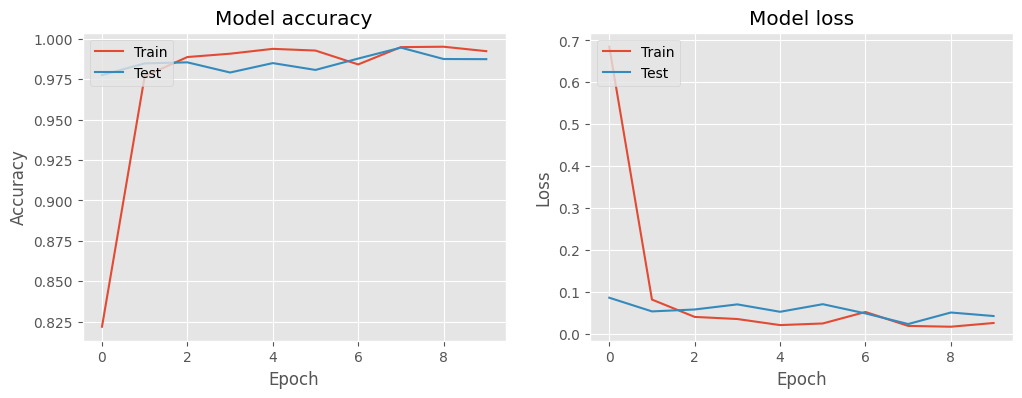

In [9]:
import matplotlib.pyplot as plt

# apply styles
plt.style.use('ggplot')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


### Evaluate the Model

In [10]:
model.evaluate(x_test, y_test, verbose=2)

333/333 - 1s - loss: 0.0425 - accuracy: 0.9874 - 786ms/epoch - 2ms/step


[0.04247811436653137, 0.987424910068512]

### Visualize the Model

In [17]:
from neuralplot import ModelPlot

modelplot = ModelPlot(model=model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 15ms/step


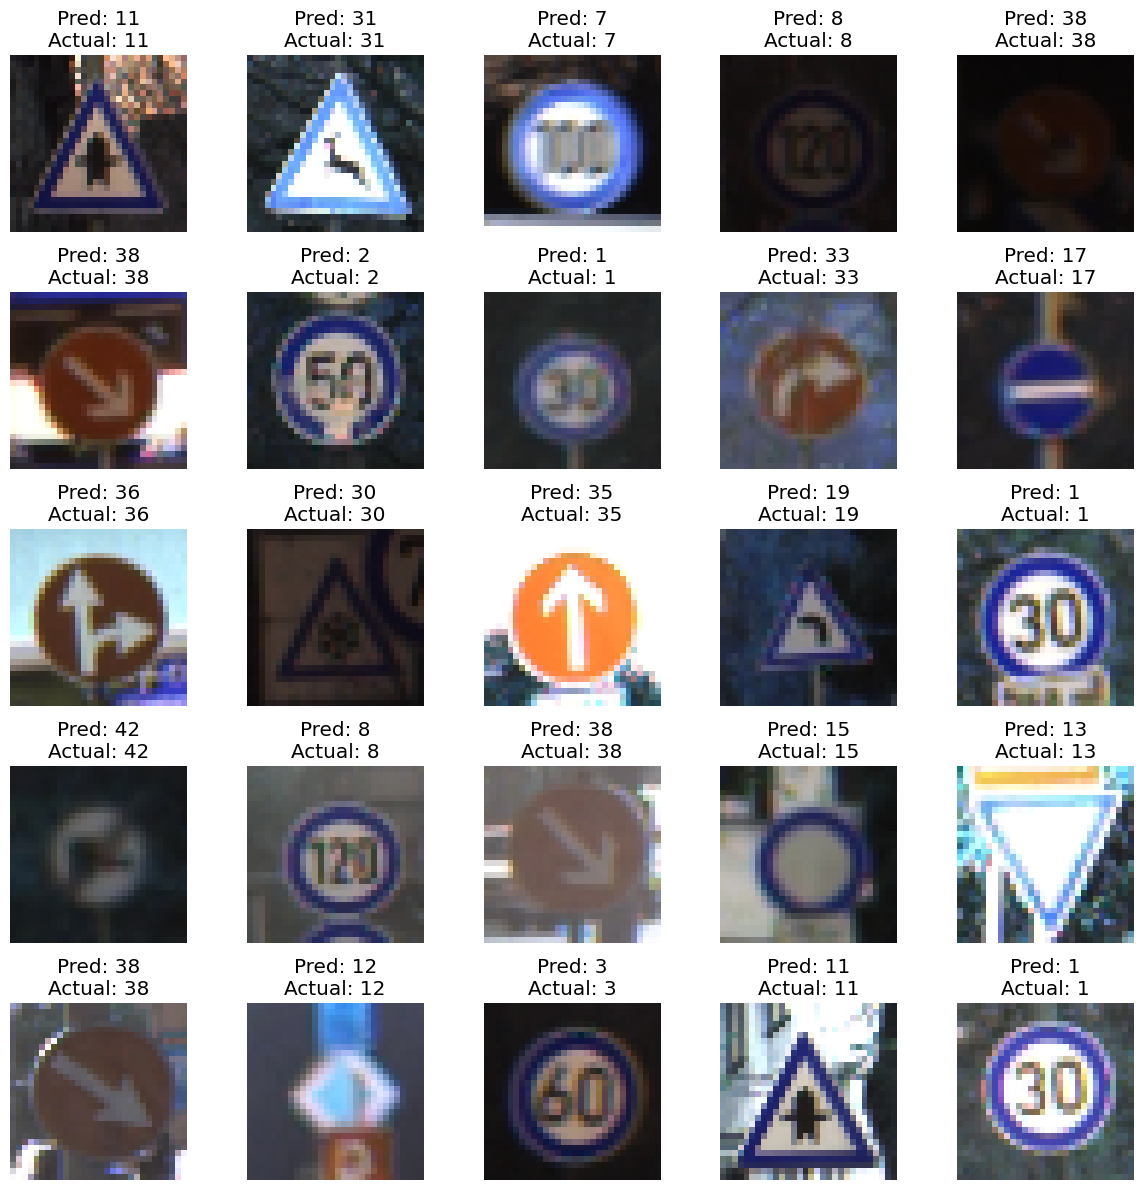

In [15]:
# Make predictions on the test set
predictions = model.predict(x_test[:25])

# Function to plot images, predictions, and true labels
def plot_images(predictions, y_test, x_test):
    # Convert predictions classes to one hot vectors 
    predicted_classes = np.argmax(predictions, axis=1)
    # Convert test observations to one hot vectors
    true_classes = np.argmax(y_test, axis=1)
    # plot the images in the batch, along with predicted and true labels
    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        img = x_test[i]
        ax.imshow(img, cmap=plt.cm.binary)
        ax.set_title(f"Pred: {predicted_classes[i]}\nActual: {true_classes[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming the model is already loaded and x_test is preprocessed if necessary
plot_images(predictions, y_test, x_test)
